# Practice 2: Linear Regression

In [1]:
import numpy as np
from pandas.io.parsers import read_csv
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def load_csv(file_name):
    values = read_csv(file_name,header=None).values
    return values.astype(float)

## Linear Regression with one variable

In [3]:
data = load_csv("data/ex1data1.csv")

In [4]:
X = data[:,:-1] # Features
Y = data[:, -1] # Target

In [5]:
print("#" * 50)
print(data[:5])
print("#" * 50)
print(X[:5])
print("#" * 50)
print(Y[:5])

##################################################
[[ 6.1101 17.592 ]
 [ 5.5277  9.1302]
 [ 8.5186 13.662 ]
 [ 7.0032 11.854 ]
 [ 5.8598  6.8233]]
##################################################
[[6.1101]
 [5.5277]
 [8.5186]
 [7.0032]
 [5.8598]]
##################################################
[17.592   9.1302 13.662  11.854   6.8233]


In [6]:
m = np.shape(X)[0] # Number of training examples

In [7]:
def h(th0, th1, x):
    return th0 + th1 * x

def cost_one_variable(X, Y, th0, th1):
    ac_0, ac_1 = 0, 0 
    for i in range(len(X)):
        ac_0 += (h(th0, th1, X[i]) - Y[i])
        ac_1 +=  (h(th0, th1, X[i]) - Y[i]) * X[i]
        
    return (ac_0,ac_1)

def gradient_descent_one_variable(X, Y, alpha = 0.01):
    th0 = 0
    th1 = 0
    
    for i in range(1500):
        tmp_th0 =  th0 - alpha * cost_one_variable(X,Y,th0,th1)[0] / len(X)
        tmp_th1 =  th1 - alpha * cost_one_variable(X,Y,th0,th1)[1] / len(X)
        th0 = tmp_th0
        th1 = tmp_th1
        
    return (th0, th1)

Aplicamos el método descenso de gradiento a nuestros datos de entrada X e Y. Tras ello dibujamos la gráfica:

In [8]:
result = gradient_descent_one_variable(X,Y)
result

(array([-3.63029144]), array([1.16636235]))

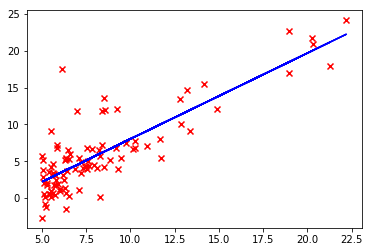

In [9]:
result = gradient_descent_one_variable(X,Y)
array_y = []
for i in X:
    array_y.append(h(result[0],result[1],i))

plt.scatter(data[:,0], data[:,1], marker= "x", color="red")
    
plt.plot(X, array_y ,color ="blue")

In [10]:
def coste_multiple_variables(X, Y, Theta):
    H = np.dot(X,Theta)
    Aux = (H-Y) **2
    return Aux.sum()/(2*len(X))

In [11]:
X=np.hstack([np.ones([m,1]), X])

A continuación se generan gráficas para mostrar la evolución del coste durante el proceso Gradiente descendente

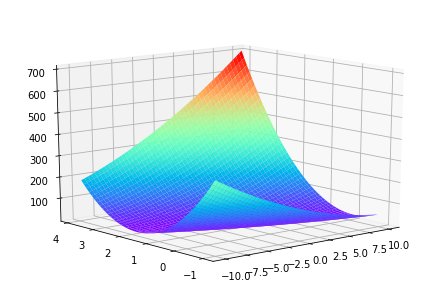

In [12]:
fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(elev=15, azim=230)
Theta0 = np.arange(-10,10,0.1)
Theta1 = np.arange(-1,4,0.1)
Theta0, Theta1 = np.meshgrid(Theta0, Theta1)

Coste = np.empty_like(Theta0)

for ix, iy in  np.ndindex(Theta0.shape):
    Coste[ix, iy] = coste_multiple_variables(X,Y,[Theta0[ix,iy], Theta1[ix,iy]])


surf = ax.plot_surface(Theta0,Theta1,Coste, cmap=cm.rainbow)

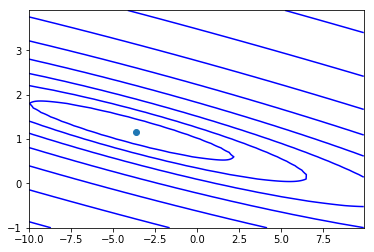

In [13]:
plt.contour(Theta0, Theta1, Coste,
           np.logspace(-2,3,20),colors='blue')
plt.scatter(result[0],result[1])

### Regresión con mútiples variables

In [14]:
data_multiple_variables = load_csv("data/ex1data2.csv")

In [15]:
X = data_multiple_variables[:,:-1] # Features
Y = data_multiple_variables[:, -1] # Target

In [16]:
print("#" * 50)
print(data_multiple_variables[:5])
print("#" * 50)
print(X[:5])
print("#" * 50)
print(Y[:5])

##################################################
[[2.104e+03 3.000e+00 3.999e+05]
 [1.600e+03 3.000e+00 3.299e+05]
 [2.400e+03 3.000e+00 3.690e+05]
 [1.416e+03 2.000e+00 2.320e+05]
 [3.000e+03 4.000e+00 5.399e+05]]
##################################################
[[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]]
##################################################
[399900. 329900. 369000. 232000. 539900.]


In [17]:
def normaliza(X):
    medias = np.mean(X,axis=0)
    sigmas = np.std(X,axis=0)
    
    X_normalizada = X / (medias - sigmas)
    
    return X_normalizada

In [18]:
X_norm = normaliza(X)
Y_norm = normaliza(Y)
m = np.shape(X)[0] # Number of training examples

In [19]:
print("#" * 50)
print(X[:5])
print("#" * 50)
print(X_norm[:5])

##################################################
[[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]]
##################################################
[[1.73243122 1.24101815]
 [1.31743819 1.24101815]
 [1.97615728 1.24101815]
 [1.1659328  0.82734544]
 [2.4701966  1.65469087]]


In [20]:
X=np.hstack([np.ones([m,1]),X])
m = np.shape(X_norm)[0]
n = np.shape(X_norm)[1]

In [57]:
def gradient_descent_multiple_variables(X, Y, alpha = 0.01, iterations = 500):
    
    m = np.shape(X)[0]
    n = np.shape(X)[1]
    costs =   []
    
    Thetas = np.ones(n)
    
    NuevaTheta = Thetas

    
    for it in range(iterations):
        H = np.dot(X, NuevaTheta)    
        Aux = (H - Y)
        
        costs.append(np.sum(H**2) / (2*m))
        
        for i in range(n):
            Aux_i = Aux * X[:, i]
            NuevaTheta[i] -= (alpha / m) * Aux_i.sum()
            
    return (NuevaTheta,costs)
   

In [58]:
result = gradient_descent_multiple_variables(X_norm,Y_norm)

In [59]:
result

(array([0.60710707, 0.43194125]),
 [4.748140101880681,
  4.535469560104043,
  4.337620782656756,
  4.153448547176662,
  3.981903481925968,
  3.8220236075342156,
  3.672926648959227,
  3.533803046294012,
  3.4039095997233813,
  3.28256368998218,
  3.1691380211470235,
  3.063055837558484,
  2.9637865711694746,
  2.8708418796920747,
  2.7837720396087793,
  2.702162661461512,
  2.6256316978649936,
  2.5538267174400198,
  2.486422420353473,
  2.4231183734098223,
  2.363636944685301,
  2.307721419550924,
  2.255134281611833,
  2.2056556436146586,
  2.1590818147562794,
  2.1152239920799993,
  2.0739070647808777,
  2.0349685212716717,
  1.9982574497945873,
  1.963633624210745,
  1.9309666673671544,
  1.900135285137402,
  1.8710265648639453,
  1.8435353325028916,
  1.8175635632919307,
  1.7930198412337073,
  1.7698188631147727,
  1.747880983168585,
  1.7271317948433678,
  1.7075017464554734,
  1.6889257877992099,
  1.6713430450476416,
  1.6546965215181504,
  1.6389328220938497,
  1.624001899289

### Pintamos la de una variable con la formula genérica

In [60]:
X = data[:,:-1] # Features
Y = data[:, -1] # Target
m = np.shape(X)[0] # Number of training examples
X=np.hstack([np.ones([m,1]),X])
result = gradient_descent_multiple_variables(X,Y)
result[0]

array([-1.92155972,  0.99470171])

In [61]:
array_y = []
for i in X:
    array_y.append(h(result[0][0],result[1],i))

plt.scatter(data[:,0], data[:,1], marker= "x", color="red")
    
plt.plot(X, array_y ,color ="blue")

ValueError: operands could not be broadcast together with shapes (500,) (2,) 

No son iguales, es debido a que al caluclar el coste no se como se hace para j = 0, ya que en teoria seria (h(th0, th1, X[i]) - Y[i]) * X[i] donde X[i] es cero

### Gráfica Coste en función del alpha

TODO: DIBUJARLO

### Cálculo con la ecuación normal

In [117]:
def normal(X, Y):
    x_transpose = np.transpose(X)
    x_transpose_dot_x = x_transpose.dot(X)
    term_1 = np.linalg.pinv(x_transpose_dot_x)
    term_2 = x_transpose.dot(Y)
    return term_1.dot(term_2)

In [118]:
normal_result = normal(X,Y)
gradient_result = gradient_descent_multiple_variables(X,Y)

In [119]:
pred_normal = normal_result[0] * 1650 + normal_result[1] * 3
pred_gradient = gradient_result[0] * 1650 + gradient_result[1] * 3

In [120]:
print("Para un piso con 3 habitaciones y una superficie de 1650 m² es:")
print("Ecuación Normal: {}".format(pred_normal))
print("Método Descenso de Gradiente {}".format(pred_gradient))

Para un piso con 3 habitaciones y una superficie de 1650 m² es:
Ecuación Normal: -6424.459348282107
Método Descenso de Gradiente 101.44696719826716


TODO: DEBERIAN SER IGUALES